In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

df = pd.read_csv("full_dataset.csv").drop('Unnamed: 0', axis=1)

In [3]:
df.columns

Index(['caseNum', 'courtDepartment', 'courtDivision', 'caseType', 'caseStatus',
       'fileDate', 'fileType', 'address', 'result', 'resultDate', 'plaintiffs',
       'defendants', 'plaintiffAttorney', 'plaintiffAttorneyCode',
       'plaintiffAttorneyAddress', 'plaintiffAttorneyPhone',
       'defendantAttorney', 'defendantAttorneyCode',
       'defendantAttorneyAddress', 'defendantAttorneyPhone', 'eventDates',
       'eventSessions', 'eventLocations', 'eventTypes', 'nextEventType',
       'nextEventDate', 'hadStatusConference', 'hadMediation', 'hadTrial',
       'judge', 'amount', 'caseDismissalReason', 'answerDate', 'docketText'],
      dtype='object')

In [4]:
def get_date_list(start_datetime, end_datetime=datetime.datetime.today().date()):
    """
    Get a list of dates to input from a start date to end date (end date default to current date)

    :param start_datetime: python datetime object to be start of search
    :param end_datetime: python datetime object to be end of search
    :return: numpy array of date strings that can be inputted into date fields
    """
    delta = datetime.timedelta(days=1)
    dates = []
    while start_datetime <= end_datetime:
        dates.append(start_datetime.strftime('%m/%d/%Y'))
        start_datetime += delta
    return np.array(dates)

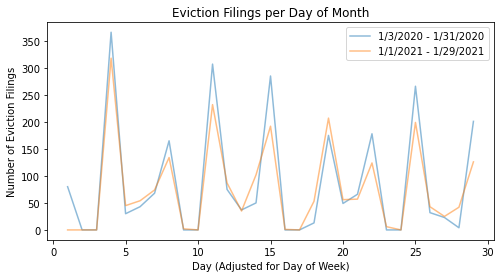

In [11]:
dates2020 = get_date_list(datetime.date(2020, 1, 1), datetime.date(2020, 1, 31))
dates2021 = get_date_list(datetime.date(2021, 1, 1), datetime.date(2021, 1, 31))

counts2020 = pd.Series({date: 0 for date in dates2020})
counts2021 = pd.Series({date: 0 for date in dates2021})

dates2020 = set(dates2020)
dates2021 = set(dates2021)

for date,value in df['fileDate'].value_counts().iteritems():
    if date in dates2020:
        counts2020[date] = value
    else:
        counts2021[date] = value

fig, ax = plt.subplots()

fig.set_size_inches(8, 4)
ax.plot(range(1,30), list(counts2020)[2:], alpha=.5, label="1/3/2020 - 1/31/2020")
ax.plot(range(1,30), list(counts2021)[:-2], alpha=.5, label="1/1/2021 - 1/29/2021")
ax.set_title("Eviction Filings per Day of Month")
ax.set_xlabel("Day (Adjusted for Day of Week)")
ax.set_ylabel("Number of Eviction Filings")
ax.legend()
plt.show()

In [52]:
df['address'].value_counts()[:10]

105 Spruce Street Watertown MA 02472          3
342 Middle Street East Weymouth MA 02189      3
47 Spruce Street 4 Clinton MA 01510           3
364 Belmont Avenue 26 Springfield MA 01108    3
174 Center Street 2nd fl Ludlow MA 01056      3
21 Niagara Street 4R Springfield MA 01105     2
302 Hollis Street 1 Framingham MA 01702       2
413 Chatham West Drive Brockton MA 02301      2
541 West Street A & B Brockton MA 02301       2
7 Brown Street Spencer MA 01562               2
Name: address, dtype: int64

In [10]:
df['result'].value_counts()

Agreement for Judgment                           1269
R 41(a)(1) Voluntary Dismissal                   1044
Judgment in SP by Default                         865
Agreement                                         467
Dismissal                                         379
Pending                                           250
Disposed                                          179
Stipulation of Dismissal                          141
Findings and Order                                 71
JudgmentPlaintiffDefendantNoAppear                 29
Dismissed                                          20
Judgment in SP case entered                        13
JudgmentPlaintiffAgreement                         13
JudgmentPlaintiffTrial                             10
Case Deleted                                        1
R 41(b)(1) Involuntary Dismissal                    1
Judgment by Default under R. 55(b)(1) entered       1
Name: result, dtype: int64

In [58]:
housing_df = pd.read_csv("housing_dataset.csv").drop('Unnamed: 0', axis=1)
district_df = pd.read_csv("district_dataset.csv").drop('Unnamed: 0', axis=1)

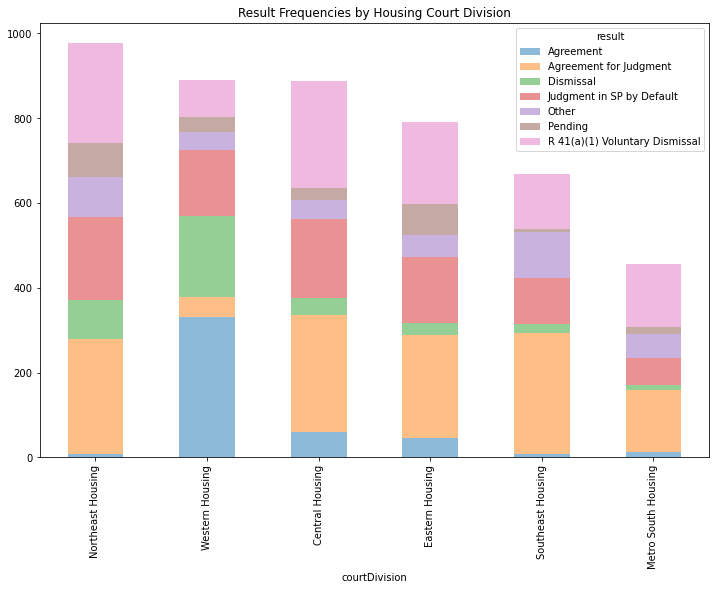

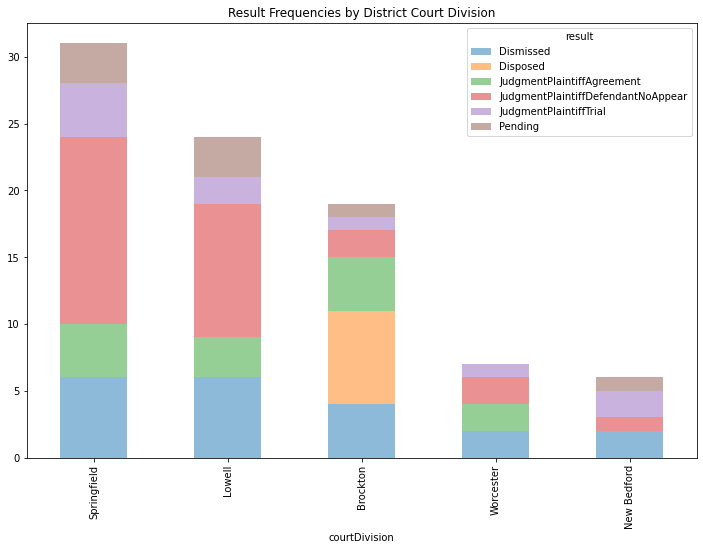

In [61]:
court_dfs = [(housing_df, "Housing"), (district_df, "District")]
for df_, name in court_dfs:
    mapped_df = df_.copy()
    map_ = {result: result if i <= 5 else 'Other' for i, result in enumerate(df_['result'].value_counts().index)}
    mapped_df['result'] = mapped_df['result'].map(map_)

    grouped_df_count = mapped_df.groupby('courtDivision')['result'].value_counts().unstack().fillna(0)
    grouped_df_count.assign(sum=grouped_df_count.sum(axis=1)).sort_values(by='sum', ascending=False).iloc[:, :-1].plot(kind='bar', legend=True, alpha=.5, stacked=True, figsize=(12,8), title="Result Frequencies by {} Court Division".format(name))
    plt.show()

In [62]:
df['plaintiffAttorney'].value_counts()[:10]

Pro Se                               599
Scolnick, Esq., Stephen M            351
Turk, Esq., Jeffrey Craig            267
Flynn, Esq., Frank Anthony           179
Higgins-Shea, Esq., Katharine Ann    103
Van Dyke, Esq., James Howard          88
Gouveia, Esq., Lisa M                 87
Kepple, Esq., Andrew M                80
Jachowicz, Esq., Robert Paul          77
Laverty, Esq., Mark R                 76
Name: plaintiffAttorney, dtype: int64

In [63]:
df['defendantAttorney'].value_counts()[:10]

Pro Se                             3976
Ahern, Esq., Sean M                  11
Bhatti, Esq., Mariyam B               8
Mount, Esq., Robert John              7
Robin, Esq., Jeremy Todd              7
Alfred, Esq., Elizabeth P             7
Pisegna, Esq., Vincent J              6
Collier, III, Esq., Paul Rodney       6
Ehrlich, Esq., Hed                    6
Lyu, Esq., Seon                       6
Name: defendantAttorney, dtype: int64

In [101]:
df['nextEventType'].value_counts()[:10]

Summary Process Trial                   2315
Motion Hearing                           779
Housing Specialist Status Conference     531
Status Hearing                           330
Housing Specialist Mediation             298
Review                                   121
Trial                                     97
Jury Trial                                41
Held                                      28
Case Management Conference                17
Name: nextEventType, dtype: int64

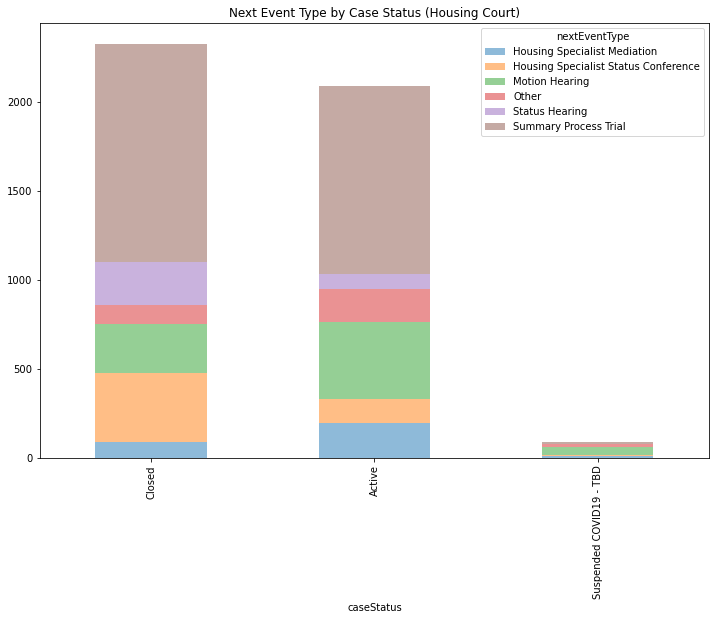

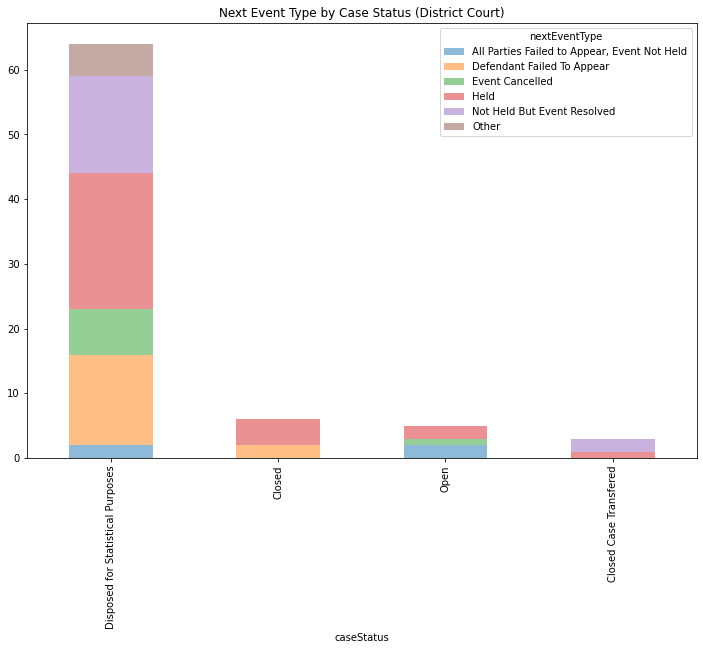

In [100]:
court_dfs = [(housing_df, "Housing", 3), (district_df, "District", 4)]
for df_, name, i in court_dfs:
    mapped_df = df_.copy()
    map_ = {result: result if i <= 4 else 'Other' for i, result in enumerate(df_['nextEventType'].value_counts().index)}
    mapped_df['nextEventType'] = mapped_df['nextEventType'].map(map_)

    grouped_df_count = mapped_df.groupby('caseStatus')['nextEventType'].value_counts().unstack().fillna(0)
    grouped_df_count.assign(sum=grouped_df_count.sum(axis=1)).sort_values(by='sum', ascending=False).iloc[:i, :-1].plot(kind='bar', legend=True, alpha=.5, stacked=True, figsize=(12,8), title="Next Event Type by Case Status ({} Court)".format(name))
    plt.show()

<AxesSubplot:title={'center':'Next Event Type by Case Status'}, xlabel='caseStatus'>

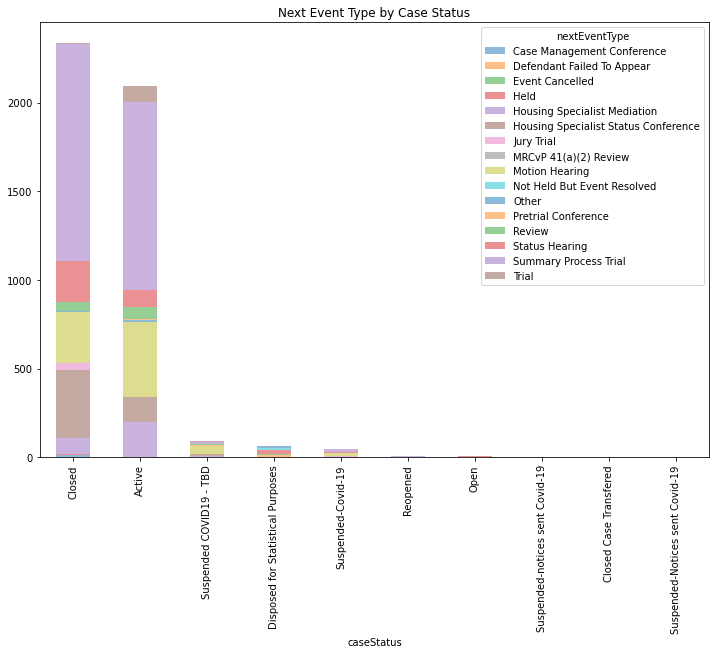

In [86]:
mapped_df = df.copy()
map_ = {result: result if i >= 8 else 'Other' for i, result in enumerate(reversed(df['nextEventType'].value_counts().index))}
mapped_df['nextEventType'] = mapped_df['nextEventType'].map(map_)

grouped_df_count = mapped_df.groupby('caseStatus')['nextEventType'].value_counts().unstack().fillna(0)
grouped_df_count.assign(sum=grouped_df_count.sum(axis=1)).sort_values(by='sum', ascending=False).iloc[:, :-1].plot(kind='bar', legend=True, alpha=.5, stacked=True, figsize=(12,8), title="Next Event Type by Case Status")

False    0.575102
True     0.424898
Name: hadStatusConference, dtype: float64


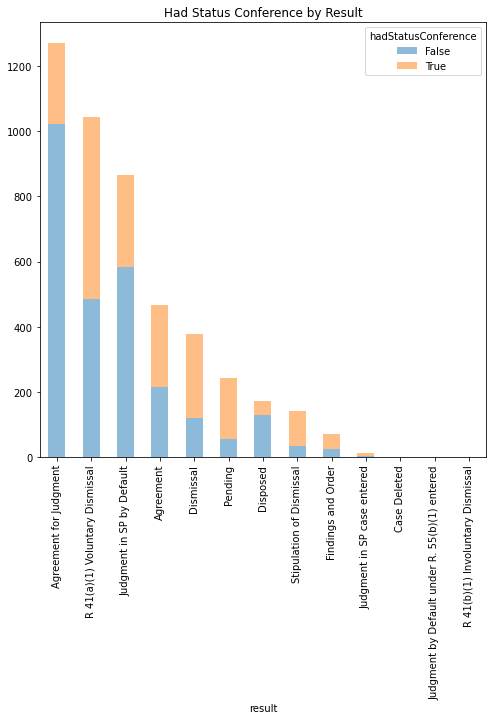

In [14]:
print(df['hadStatusConference'].value_counts(normalize=True))
grouped_df_count = df.groupby('result')['hadStatusConference'].value_counts().unstack().fillna(0)
grouped_df_count.assign(sum=grouped_df_count.sum(axis=1)).sort_values(by='sum', ascending=False).iloc[:, :-1].plot(kind='bar', legend=True, alpha=.5, stacked=True, figsize=(8,8), title="Had Status Conference by Result")
plt.show()

False    0.87658
True     0.12342
Name: hadMediation, dtype: float64


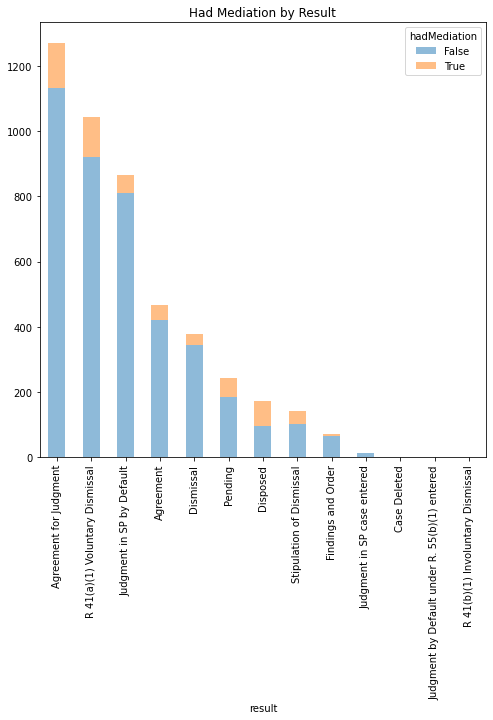

In [15]:
print(df['hadMediation'].value_counts(normalize=True))
grouped_df_count = df.groupby('result')['hadMediation'].value_counts().unstack().fillna(0)
grouped_df_count.assign(sum=grouped_df_count.sum(axis=1)).sort_values(by='sum', ascending=False).iloc[:, :-1].plot(kind='bar', legend=True, alpha=.5, stacked=True, figsize=(8,8), title="Had Mediation by Result")
plt.show()

True     0.701736
False    0.298264
Name: hadTrial, dtype: float64


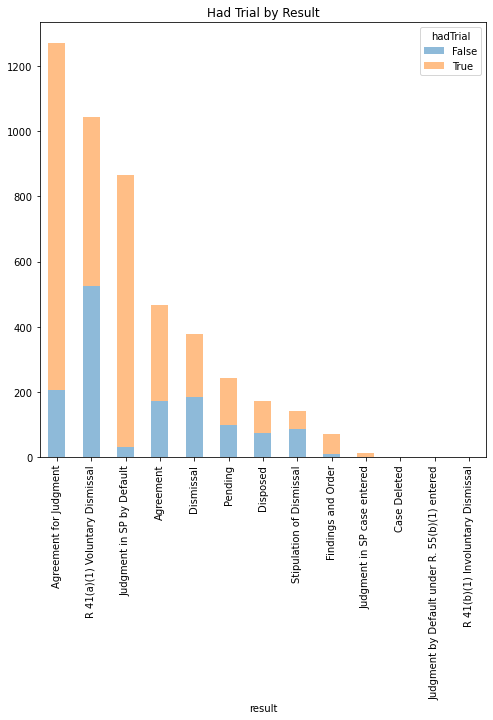

In [20]:
print(df['hadTrial'].value_counts(normalize=True))
grouped_df_count = df.groupby('result')['hadTrial'].value_counts().unstack().fillna(0)
grouped_df_count.assign(sum=grouped_df_count.sum(axis=1)).sort_values(by='sum', ascending=False).iloc[:, :-1].plot(kind='bar', legend=True, alpha=.5, stacked=True, figsize=(8,8), title="Had Trial by Result")
plt.show()

Median amount: $5119.140602549245
Median amount: $2697.34
Maximum amount: $59688.93


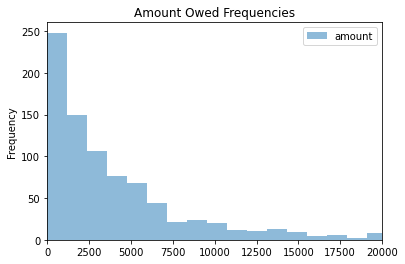

In [77]:
print("Mean amount: ${}".format(df['amount'].mean()))
print("Median amount: ${}".format(df['amount'].median()))
print("Maximum amount: ${}".format(df['amount'].max()))
df['amount'].plot.hist(legend=True, alpha=.5, xlim=(0,20000), bins=50, title="Amount Owed Frequencies")
plt.show()

In [111]:
import re
def getAmountOwed(docket_text):
    money_pattern = "\$?([0-9]{1,3},([0-9]{3},)*[0-9]{3}|[0-9]+)(\.[0-9][0-9])"
    matches = list(re.finditer(money_pattern, docket_text))
    if len(matches) > 0:
        start, end = matches[-1].span()
        amount = float(docket_text[start:end].replace(",", "").replace("$", ""))
    else:
        amount = float("nan")

    return amount

district_df['amount'] = district_df['docketText'].apply(getAmountOwed)

Mean amount: $5793.12
Median amount: $3308.45
Maximum amount: $23606.21


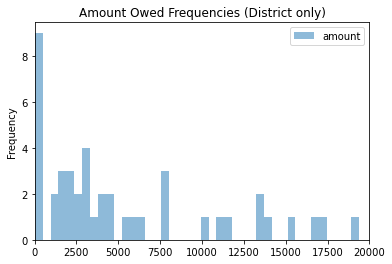

In [119]:
print("Mean amount: ${0:.2f}".format(district_df['amount'].mean()))
print("Median amount: ${}".format(district_df['amount'].median()))
print("Maximum amount: ${}".format(district_df['amount'].max()))
district_df['amount'].plot.hist(legend=True, alpha=.5, xlim=(0,20000), bins=50, title="Amount Owed Frequencies (District only)")
plt.show()

In [80]:
df['caseDismissalReason'].value_counts()[:10]

Plaintiff's request.                                                                          73
Neither party appeared..                                                                      28
By order of the court..                                                                       17
Plaintiff failed to appear..                                                                  11
Neither party appeared..\nThis case will be dismissed in seven days if no action is taken.     5
Judgment of Dismissal.                                                                         4
Plaintiff's request.\nVoluntary dismissal filed                                                3
Judgment of Dismissal.\nLack of Jurisdiction                                                   2
Neither party appeared..\nThis case will be dismissed in 7 days if no action is taken.         2
Plaintiff's request.\nVoluntary Dismissal Filed                                                2
Name: caseDismissalReason, dty